
Develop an anomaly detection system for high-dimensional network traffic data using the KDD Cup 1999 dataset.


              precision    recall  f1-score   support

           0       0.98      0.92      0.95     97278
           1       0.18      0.50      0.26      3377

    accuracy                           0.90    100655
   macro avg       0.58      0.71      0.61    100655
weighted avg       0.95      0.90      0.93    100655



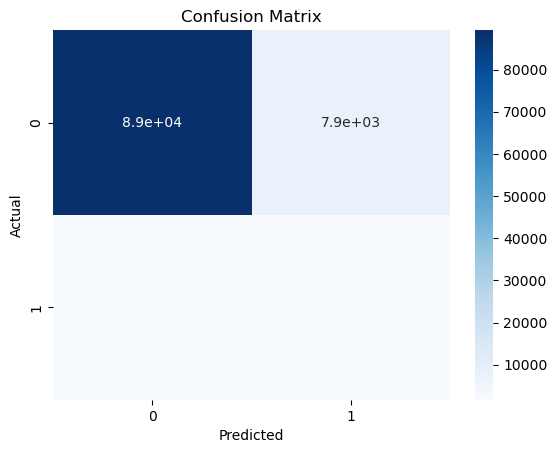

In [6]:
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess
df = fetch_kddcup99(subset='SA', percent10=True, as_frame=True).frame
for col in ['protocol_type', 'service', 'flag']:
    df[col] = LabelEncoder().fit_transform(df[col])

X = StandardScaler().fit_transform(df.drop('labels', axis=1))
y = (df['labels'] != b'normal.').astype(int)

# Train and predict
model = IsolationForest(random_state=0)
y_pred = np.where(model.fit_predict(X) == 1, 0, 1)

# Results
print(classification_report(y, y_pred))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
